# Pymaceuticals Inc.
---

### Analysis

- Based on the findings of this analysis, Capomulin is one of the most effective drugs at reducing tumor volume in this study. The Capomulin and Ramicane treatment groups showed a lower mean tumor volume and a lower tumor volume at the end of the study. The tumor volume of each mouse is highly correlated to their weight, demonstrating a strong positive relationship. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice = mouse_data_complete["Mouse ID"].unique()
print(unique_mice)
len(unique_mice)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouses = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouses)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_complete.loc[mouse_data_complete['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data_complete.loc[(mouse_data_complete["Mouse ID"]!="g989")]

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data["Mouse ID"].unique()
print(clean_mice)
len(clean_mice)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'h246' 'h333' 'h428'
 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755'
 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862' 'k894'
 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733' 'l872'
 'm133

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats = ["mean","median","var","std","sem"]
summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": stats})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

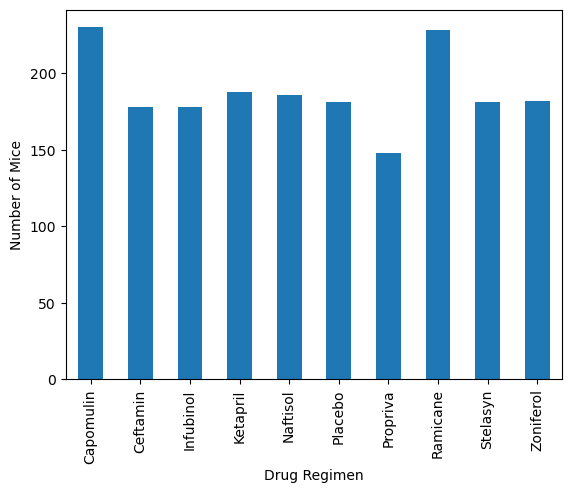

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice = clean_data.groupby("Drug Regimen").count()
count_mice_df = pd.Series(count_mice["Timepoint"])
ax =count_mice_df.plot.bar()
ax.set_ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

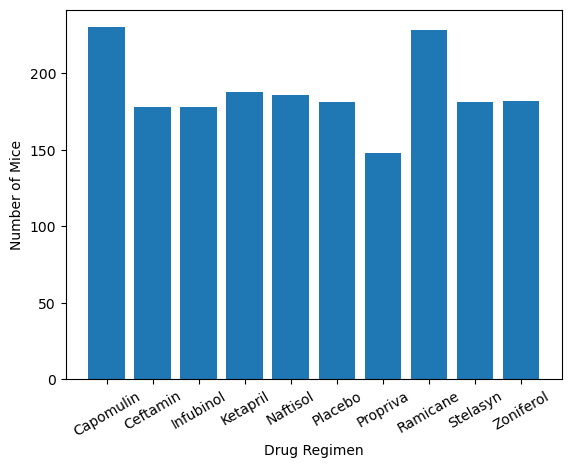

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_mice = clean_data.groupby("Drug Regimen").count()
x = count_mice.index
y = count_mice["Mouse ID"]
plt.bar(x,y)
plt.xticks(rotation=30)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

<Axes: ylabel='count'>

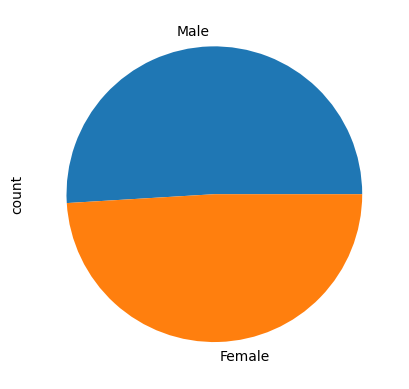

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_data["Sex"].value_counts().plot.pie()

([<matplotlib.patches.Wedge at 0x1ec5a7b5210>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51%'),
  Text(0.018044734954153686, -0.5997285948997549, '49%')])

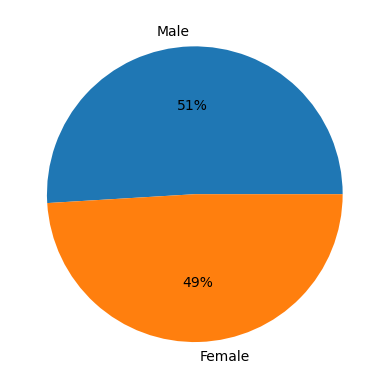

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=clean_data["Sex"].value_counts()
labels = ["Male","Female"]
plt.pie(sizes, labels=labels, autopct='%1.0f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
time_data = clean_data.groupby(["Mouse ID"])["Timepoint"]
maxtime = pd.DataFrame(time_data.max())
mice_data = pd.merge(clean_data, maxtime, how="right", on=["Mouse ID", "Timepoint"])
mice_data
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentdrugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
# Determine outliers using upper and lower bounds
for drug in treatmentdrugs:
    regimen = mice_data[(mice_data["Drug Regimen"]==drug)]
    quartiles = regimen["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr= upper - lower 
    upperlim = upper + 1.5*iqr
    lowerlim = lower - 1.5*iqr
    print(f'The bounds for {drug} are ({lowerlim},{upperlim}), and anything outside of that is an outlier')
    drug_vol = regimen["Tumor Volume (mm3)"]  
    tumor_vol.append(drug_vol)
    upper_outliers = drug_vol > upperlim
    lower_outliers = drug_vol < lowerlim
    all_outliers = upper_outliers | lower_outliers
    outlier_values = drug_vol[all_outliers]
    print(outlier_values)
#     for mouse in drug_vol:
#         if mouse < lowerlim:
#             tumor_vol.append(mouse)
#         if mouse > upperlim:
#             tumor_vol.append(mouse)
#     print(f'The outliers are {tumor_vol}')

The bounds for Capomulin are (20.70456164999999,51.83201549), and anything outside of that is an outlier
Series([], Name: Tumor Volume (mm3), dtype: float64)
The bounds for Ramicane are (17.912664470000003,54.30681135), and anything outside of that is an outlier
Series([], Name: Tumor Volume (mm3), dtype: float64)
The bounds for Infubinol are (36.83290494999999,82.74144559000001), and anything outside of that is an outlier
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The bounds for Ceftamin are (25.355449580000002,87.66645829999999), and anything outside of that is an outlier
Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

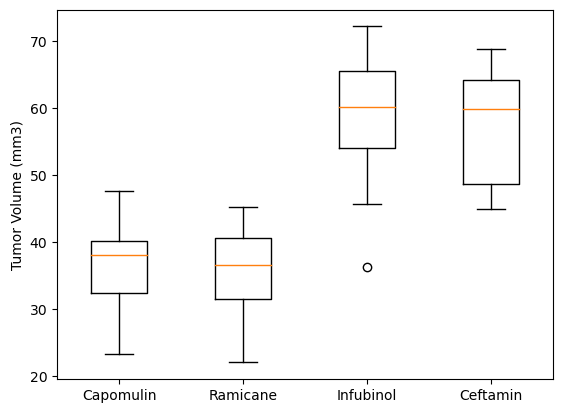

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol)
plt.xticks(ticks= [1,2,3,4 ],labels = treatmentdrugs)
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

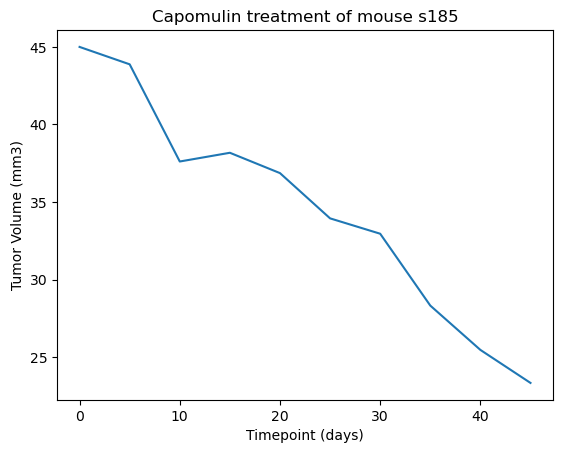

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomouse = clean_data[(clean_data["Mouse ID"]=="s185")]
capomouse
x_val = capomouse["Timepoint"]
y_val = capomouse["Tumor Volume (mm3)"]
plt.plot(x_val,y_val)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")

Text(0.5, 1.0, 'Capomulin Tumor Volume by Weight')

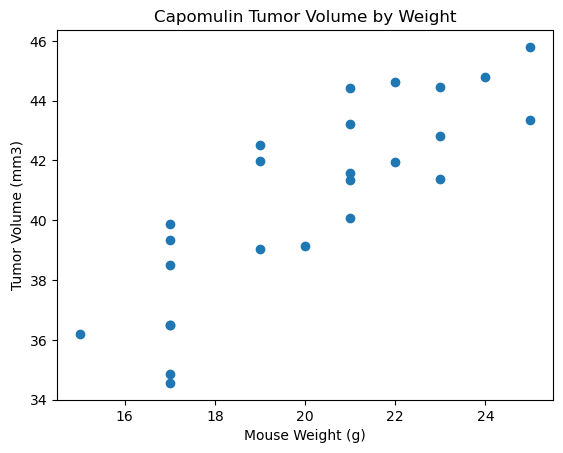

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice = capomulin["Mouse ID"].unique()

miceweight =[]
tumor_weight = []
for mouse in mice:
    capomulin_mouse = capomulin[(capomulin["Mouse ID"]==mouse)]
    weight = capomulin_mouse["Weight (g)"].mean()
    tumor = capomulin_mouse["Tumor Volume (mm3)"].mean()
    miceweight.append(weight)
    tumor_weight.append(tumor)
    
x_vals = pd.Series(miceweight)
y_vals = tumor_weight
plt.scatter(x_vals,y_vals)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Tumor Volume by Weight")

## Correlation and Regression

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


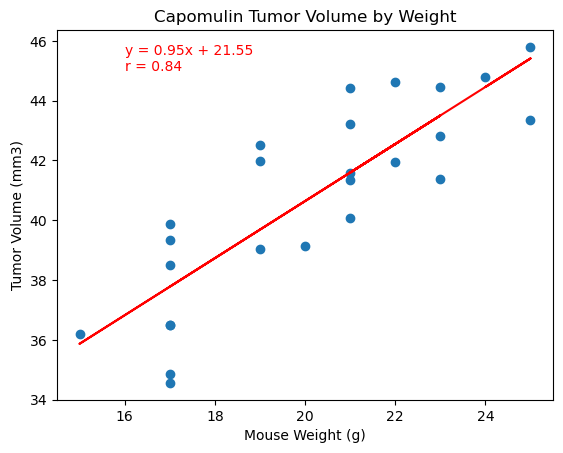

In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_vals = pd.Series(miceweight)
y_vals = tumor_weight
plt.scatter(x_vals,y_vals)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Tumor Volume by Weight")
correlation = st.pearsonr(x_vals, y_vals)
print(correlation)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}\n' + f'r = {round(rvalue,2)}'
regressvals = slope*x_vals + intercept
plt.annotate(line_eq,(16,45), color = "r")
plt.plot(x_vals,regressvals,"r")
plt.show()